<a href="https://colab.research.google.com/github/rjc89/Tutorials/blob/master/Recursion%2C_the_Fibonacci_Sequence_and_Memoization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# this approach produces needless repetition

def fibonacci(n):
  if n == 1:
    return 1
  elif n == 2: 
    return 2
  elif n > 2:
    return fibonacci(n-1) + fibonacci(n-2)   # function calling itself == RECURSION

In [3]:
for n in range(1, 11):
  print(n, " ", fibonacci(n))


1   1
2   2
3   3
4   5
5   8
6   13
7   21
8   34
9   55
10   89


In [0]:
# use memoisation to store the previous function call outputs CACHE THE VALUES

In [0]:
# Explicit memoisation solution

fibonacci_cache = {}

def fibonacci(n):
  if n in fibonacci_cache:
    return fibonacci_cache[n]
  
  if n == 1:
    value = 1
  elif n == 2:
    value = 1
  elif n > 2:
    value = fibonacci(n-1) + fibonacci(n-2)

  fibonacci_cache[n] = value

  return value

In [6]:
for n in range(1, 101):
  print(n, " ", fibonacci(n))

1   1
2   1
3   2
4   3
5   5
6   8
7   13
8   21
9   34
10   55
11   89
12   144
13   233
14   377
15   610
16   987
17   1597
18   2584
19   4181
20   6765
21   10946
22   17711
23   28657
24   46368
25   75025
26   121393
27   196418
28   317811
29   514229
30   832040
31   1346269
32   2178309
33   3524578
34   5702887
35   9227465
36   14930352
37   24157817
38   39088169
39   63245986
40   102334155
41   165580141
42   267914296
43   433494437
44   701408733
45   1134903170
46   1836311903
47   2971215073
48   4807526976
49   7778742049
50   12586269025
51   20365011074
52   32951280099
53   53316291173
54   86267571272
55   139583862445
56   225851433717
57   365435296162
58   591286729879
59   956722026041
60   1548008755920
61   2504730781961
62   4052739537881
63   6557470319842
64   10610209857723
65   17167680177565
66   27777890035288
67   44945570212853
68   72723460248141
69   117669030460994
70   190392490709135
71   308061521170129
72   498454011879264
73   80651553304

In [0]:
# using the functools library to do the same memoisation in fewer lines

In [0]:
from functools import lru_cache

In [0]:
# this allows the original solution to work with memoisation

@lru_cache(maxsize=1000)
def fibonacci(n):
  if n == 1:
    return 1
  elif n == 2: 
    return 2
  elif n > 2:
    return fibonacci(n-1) + fibonacci(n-2)

In [9]:
for n in range(1, 101):
  print(n, " ", fibonacci(n))

1   1
2   2
3   3
4   5
5   8
6   13
7   21
8   34
9   55
10   89
11   144
12   233
13   377
14   610
15   987
16   1597
17   2584
18   4181
19   6765
20   10946
21   17711
22   28657
23   46368
24   75025
25   121393
26   196418
27   317811
28   514229
29   832040
30   1346269
31   2178309
32   3524578
33   5702887
34   9227465
35   14930352
36   24157817
37   39088169
38   63245986
39   102334155
40   165580141
41   267914296
42   433494437
43   701408733
44   1134903170
45   1836311903
46   2971215073
47   4807526976
48   7778742049
49   12586269025
50   20365011074
51   32951280099
52   53316291173
53   86267571272
54   139583862445
55   225851433717
56   365435296162
57   591286729879
58   956722026041
59   1548008755920
60   2504730781961
61   4052739537881
62   6557470319842
63   10610209857723
64   17167680177565
65   27777890035288
66   44945570212853
67   72723460248141
68   117669030460994
69   190392490709135
70   308061521170129
71   498454011879264
72   806515533049393
73

In [0]:
@lru_cache(maxsize=1000)
def fibonacci(n):
  # NOW add type error handling
  if type(n) != int:
    raise TypeError("n must be a positive int") # helpful error message
  if n < 1:
    raise TypeError("n must be a positive int")

  if n == 1:
    return 1
  elif n == 2: 
    return 2
  elif n > 2:
    return fibonacci(n-1) + fibonacci(n-2)

In [13]:
print(fibonacci(-1))

TypeError: ignored

In [0]:
import matplotlib.pyplot as plt
fibonacci_nos = []
for n in range(1, 50):
  fibonacci_nos.append(fibonacci(n))


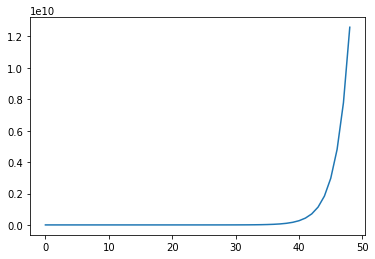

In [22]:
plt.plot(fibonacci_nos)

In [0]:

def fibonacci(n=10):
    """ Generate pairs of fibonacci numbers upto 10 starting with 1,2 ... """

    a, b = 0,1
    for i in range(n):
        c = a + b
        yield (c,b)
        a,b=b,c

In [0]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

def golden_rectangles(max_n=10):
    """ Generate and plot successive golden rectangles """

    # List of fibonacci numbers as (fn, fn-1) pair
    fibs = list(fibonacci(max_n))
    # Reverse as we need to generate rectangles
    # from large -> small
    fibs.reverse()

    # Create a sub-plot
    fig, ax = plt.subplots(1)

    last_x, last_y = fibs[0]
    # Make the plot size large enough to hold
    # the largest fibonacci number on both
    # x and y-axis.
    ax.set_xlim(0, last_x + 10)
    ax.set_ylim(0, last_y + 10)
    # Turn off the axes
    plt.axis('off')

    # First rectangle is centered at (0,0)
    origin = [0, 0]

    # Rectangles
    rects = []
    
    for i,(cur_fn, prev_fn) in enumerate(fibs):
        # Plot upto max_n + 1 rectangles
        if i > max_n: break

        if i in fourth_series(max_n):
            # Every 4th rectangle from the 2nd
            # rectangle onwards has its origin-x
            # point shifted by the fibonacci value
            origin[0] = origin[0] + cur_fn

        elif i in sixth_series(max_n):
            # Every 6th rectangle from the 5th
            # rectangle onwards has its origin-y
            # point shifted by the fibonacci value
            origin[1] = origin[1] + cur_fn
            
        if i%2 == 1:
            # Every 2nd rectangle has its orientation
            # switched from lxb to bxl
            cur_fn, prev_fn = prev_fn, cur_fn

        rectangle = Rectangle(origin, cur_fn, prev_fn, angle=0.0, antialiased=True)
        rects.append(rectangle)

    # Add the rectangles to the plot - we need transparency
    # so that the embedded rectangles all show up   
    rect_pcs = PatchCollection(rects, facecolor='g', alpha=0.4,
                               edgecolor='black')

    ax.add_collection(rect_pcs)
    plt.show()

In [0]:
def fourth_series(n=10):
    """ Generate 1, 5, 9 ... upto n elements """

    x = 1
    for i in range(n):
        yield x
        x += 4

def sixth_series(n=10):
    """ Generate 4, 10, 16 ... upto n elements """

    x=4
    for i in range(n):
        yield x
        x += 6

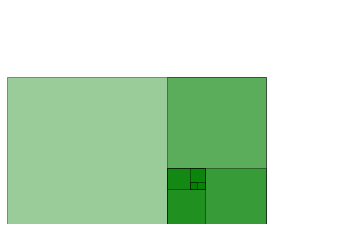

In [31]:
golden_rectangles(max_n=8)